In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Fetch S&P 500 data
def get_sp500_tickers():
    # Get S&P 500 tickers from Wikipedia
    sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    table = pd.read_html(sp500_url, header=0)
    tickers = table[0]['Symbol'].tolist()
    return tickers

# Fetch S&P 500 tickers
tickers = get_sp500_tickers()
tickers = [ticker.replace('.', '-') for ticker in tickers]  # Adjust for yfinance

In [11]:
# Download historical data for the last year
data = yf.download(tickers, start="2023-01-01", end="2024-01-01")['Adj Close']

321.95s - thread._ident is None in _get_related_thread!
0.01s - thread._ident is None in _get_related_thread!
[*********************100%***********************]  498 of 502 completed

127 Failed downloads:
[*********************100%***********************]  501 of 502 completed['SOLV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1672549200, endDate = 1704085200")')
['SJM', 'OXY', 'HON', 'RJF', 'PNW', 'BAC', 'HWM', 'WMT', 'WYNN', 'EG', 'CFG', 'LNT', 'HII', 'AMGN', 'UNH', 'STE', 'BR', 'ROST', 'DTE', 'FIS', 'GD', 'PLTR', 'PCG', 'VICI', 'FFIV', 'PNR', 'SYY', 'CMI', 'IEX', 'NFLX', 'CDW', 'LH', 'NKE', 'NSC', 'KMI', 'POOL', 'CARR', 'MTD', 'CINF', 'ORLY', 'BLK', 'ANET', 'MCD', 'JBL', 'LLY', 'NOW', 'AMD', 'BIIB', 'FE', 'PFG', 'AAPL', 'OMC', 'ULTA', 'EA', 'CLX', 'RF', 'FAST', 'GEN', 'GEV', 'CMG', 'AKAM', 'DVN', 'UDR', 'JNJ', 'HIG', 'IBM', 'MRNA', 'CTSH', 'MTB', 'IVZ', 'ECL', 'HUM

In [21]:
# Remove stocks with excessive missing values
data_rem = data.dropna(thresh=int(0.8 * len(data.columns)), axis=0)  # At least 80% valid data for a row
data_rem = data.dropna(thresh=int(0.8 * len(data)), axis=1)  # At least 80% valid data for a stock


In [22]:
# Step 2: Calculate daily returns
returns = data_rem.pct_change(fill_method=None).dropna(axis='rows')

# Step 3: Compute covariance matrix
cov_matrix = returns.cov()

# Step 4: Perform spectral decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 5: Analyze results
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Explained variance ratio
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Dominant principal component
dominant_pc = eigenvectors[:, 0]

# Create a DataFrame for stock weights in the dominant principal component
stock_weights = pd.DataFrame({
    'Stock': returns.columns,
    'Weight': dominant_pc
})
stock_weights = stock_weights.sort_values(by='Weight', ascending=False)



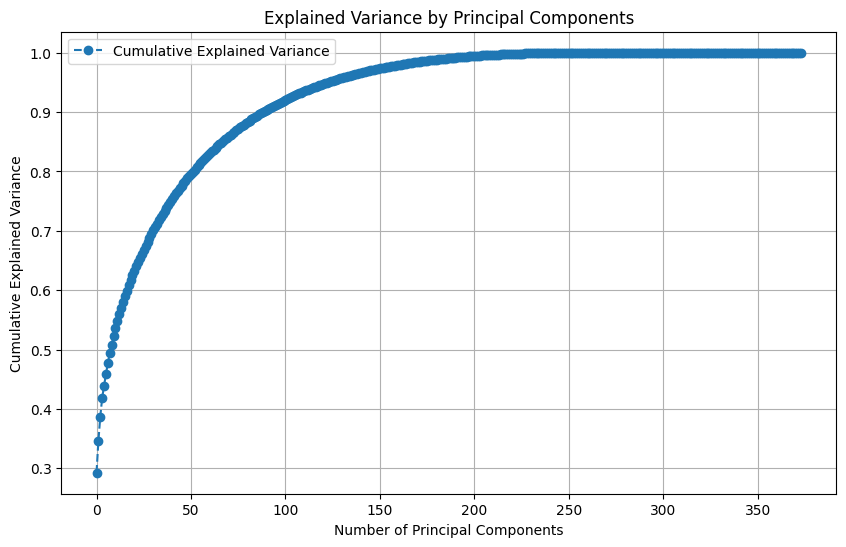

    Stock    Weight
202   KEY  0.123985
274  PARA  0.110480
129  ENPH  0.109957
161  GNRC  0.105466
360   WBD  0.104752
58    BXP  0.099867
17    ALB  0.098757
328   TFC  0.097578
254  NCLH  0.096746
349   USB  0.096355


In [23]:

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Show top 10 stocks with the highest weights in the dominant principal component
print(stock_weights.head(10))